# Clase 7

El objetivo con esta sesión es entender las nociones básicas y metodología, para realizar una simulación de algún proceso de nuestra vida cotidiana o profesional. 

## Etapas para realizar un estudio de simulación

> - *Definición del sistema*: determinar la interacción del sistema con otros sistemas, restricciones, interacción e interrelación de variables de interés y los resultados esperados.
> - *Formulación de un modelo*: Es necesario definir todas las variables que forman parte del sistema y además definir un diagrama de flujo que describa la forma completa del modelo.
> - *Colección de datos*: Definir los datos necesarios para el modelo. Datos pueden provenir de registros contables, órdenes de trabajo, órdenes de compra, opiniones de expertos y si no hay otro remedio por experimentación.
> - *Validación*: En esta etapa es posible detectar deficiencias en la formulación del modelo o en los datos sumunistrados al modelo. Formas de validar un modelo son:
    - Opinión de expertos.
    - Exactitud con que se predicen datos hitóricos.
    - Exactitud de la predicción del futuro.
    - La aceptación y confianza en el modelo de la persona que hará uso de los resultados que arroje el experimento de simulación.
    
> - *Experimentación*: La experimentación con el modelo se realiza después de que éste ha sido validado. La experimentación consiste en generar los datos deseados y en realizar el análisis de sensibilidad de los índices requeridos.
> - *Interpretación*: Se interpretan los resultados que arroja la simulación y en base a esto se toma una decisión.
> - *Documentación*: 
    - Datos que debe de tener el modelo
    - Manual de usurario
        

# Casos positivos Covid-19

In [1]:
# Importación de paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st

In [5]:
data = pd.read_csv('total_cases.csv')

data.tail(10)

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
172,2020-06-20,8635147,27878.0,1838.0,11504.0,855.0,166.0,3.0,26.0,39557.0,...,74.0,853.0,6025.0,12.0,3591.0,349.0,25.0,919.0,1430.0,479.0
173,2020-06-21,8797066,28424.0,1891.0,11631.0,855.0,172.0,3.0,26.0,41191.0,...,74.0,859.0,6216.0,12.0,3790.0,349.0,25.0,923.0,1430.0,486.0
174,2020-06-22,8926862,28833.0,1927.0,11771.0,855.0,176.0,3.0,26.0,42772.0,...,76.0,876.0,6358.0,12.0,3918.0,349.0,25.0,941.0,1430.0,489.0
175,2020-06-23,9063774,29143.0,1995.0,11920.0,855.0,183.0,3.0,26.0,44918.0,...,76.0,882.0,6500.0,12.0,4048.0,349.0,25.0,967.0,1430.0,512.0
176,2020-06-24,9229573,29481.0,2047.0,12076.0,855.0,186.0,3.0,26.0,44918.0,...,76.0,885.0,6755.0,12.0,4186.0,349.0,25.0,992.0,1477.0,525.0
177,2020-06-25,9400810,29715.0,2114.0,12248.0,855.0,189.0,3.0,65.0,49838.0,...,80.0,902.0,6990.0,12.0,4365.0,352.0,25.0,1015.0,1489.0,530.0
178,2020-06-26,9582321,30175.0,2192.0,12445.0,855.0,197.0,3.0,65.0,52444.0,...,81.0,907.0,7228.0,12.0,4563.0,352.0,25.0,1076.0,1497.0,551.0
179,2020-06-27,9771518,30451.0,2269.0,12685.0,855.0,212.0,3.0,65.0,52444.0,...,81.0,919.0,7490.0,12.0,4779.0,353.0,25.0,1089.0,1531.0,561.0
180,2020-06-28,9952808,30616.0,2330.0,12968.0,855.0,244.0,3.0,65.0,57731.0,...,81.0,924.0,7725.0,12.0,5130.0,354.0,208.0,1103.0,1531.0,567.0
181,2020-06-29,10112754,30967.0,2402.0,13273.0,855.0,267.0,3.0,65.0,57731.0,...,81.0,929.0,8031.0,12.0,5297.0,355.0,208.0,1118.0,1557.0,567.0


(80,)

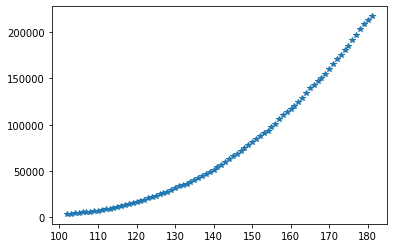

In [15]:
data_mex = data['Mexico'].tail(80)

data_mex.plot(style='*')
data_mex.shape

((40,), (41,))

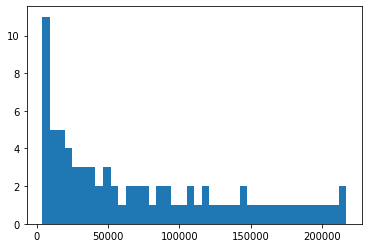

In [22]:
y, x, _ = plt.hist(data_mex, bins=40)
y.shape, x.shape

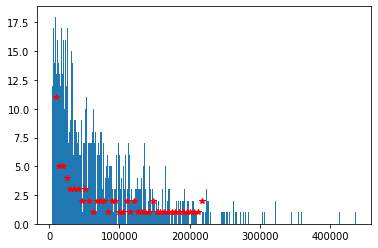

In [31]:
loc, scale = st.expon.fit(data_mex)

y_random = st.expon.rvs(loc=loc, scale=scale, size=1000)

plt.plot(x[1:], y, 'r*')
y1, x1, _ = plt.hist(y_random, bins=400)

## ¿Cómo usaríamos montecarlo para saber en un futuro cuantas personas es probable que se infecten?

In [44]:
escenarios, fecha_futura = 1000, 7

y_random = st.expon.rvs(loc=loc, scale=scale, size=[escenarios, fecha_futura])
dia = 1
y_random.mean(axis=0).cumsum()[dia -1]

79384.75626988435

# Simular dado cargado

<BarContainer object of 6 artists>

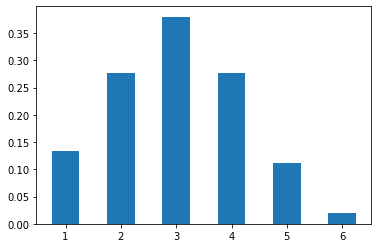

In [139]:
np.random.seed(344)
n = int(3/.5)
p = .5
data_cargado = st.binom.rvs(n, p, size=10000)
data_cargado[data_cargado == 0] = 1

y, x = np.histogram(data_cargado, bins=len(set(data_cargado)) , density=True)
plt.bar(np.arange(1,7), y, width=.5)


# Ejercicio

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

In [ ]:
# Solución- 
# 1. Suponer dado no cargado
# 2. Suponer dado cargado según la distriución anterior

# Ejemplo de aplicación- Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

## Objetivo
Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

## Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos


In [61]:
################## Programa realizado en clase de forma conjunta  de forma ineficiente
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80

Personas = np.random.rand(300)
# Listas
T_atencion = []

Can_mujeres = []
Can_hombres = []

Ganancias = []
P_atendidas = []
Consu_h = []
Consu_m = []
# ciclo de los días
for j in range(d):
    t_atencion = 0 # Tiempo de atención 
    i = 0 # Personas
    N_mujeres = 0 # número de mujeres
    N_hombres = 0 # número de hombres
    c_hombre = 0  # consumo total hombre
    c_mujer = 0  # consumo total mujer
    
    
    # Día de trabajo 
    while t_atencion <= T:
        t_llegada = np.random.uniform(T_at_min,T_at_max)
        t_atencion += t_llegada
        if Personas[i]<0.5:
            t_persona = np.random.uniform(T_mujer_min,T_mujer_max)
            t_atencion += t_persona
            N_mujeres += 1
            c_mujer += np.random.uniform(C_mujer_min,C_mujer_max)
        else:
            t_persona = np.random.uniform(T_hombre_min,T_hombre_max)
            t_atencion += t_persona
            N_hombres += 1
            c_hombre += np.random.uniform(C_hombre_min,C_hombre_max)
        
        i += 1
        T_atencion.append(t_persona)

    Can_mujeres.append(N_mujeres)
    Can_hombres.append(N_hombres)

    Ganancias.append((c_hombre+c_mujer)*0.6)
    P_atendidas.append(i)
    Consu_h.append(c_hombre)
    Consu_m.append(c_mujer)
        
# print('Los gastos de hombres en los 5 días fueron:',Consu_h)
# print('En promedio los hombres gastaron:',np.mean(Consu_h))
# print('Los gastos de mujeres en los 5 días fueron:',Consu_m)
# print('En promedio los mujeres gastaron:',np.mean(Consu_m))
print('El número de personas atendidas fueron:',np.mean(P_atendidas))
# print('En promedio la cantidad de personas atendidas fueron:',np.mean(P_atendidas))
# print('El tiempo de atención total fue:',T_atencion)
# print('El tiempo de atención promedio fue:',np.mean(T_atencion))
# print('Los ingresos totales fueron:',Ganancias)
# print('La rentabilidad fue de:',np.array(Ganancias)*.6)
# print('La rentabilidad promedio fue:',np.mean(np.array(G_total)*.6))
# print('El atención promedio por persona fue:',np.mean(T_atencionPersonas)/60)

Los ingresos totales fueron: [433264.598086127, 418011.21485483844, 410302.32893752103, 441328.2695133706, 471097.2583957135]
La rentabilidad fue de: [259958.75885168 250806.7289129  246181.39736251 264796.96170802
 282658.35503743]


## Programación funcional y vectorizada

In [20]:
# Definición de la función que simula la cafetería del ITESO
def SimCafeteria(Personas,T):
    # Información suministrada por la cafetería del ITESO
#     T = 25200
    Tat_min = 5; Tat_max=30
    Tmujer_min = 60; Tmujer_max = 150
    Thombre_min = 40; Thombre_max = 120
    Gmujer_min = 30; Gmujer_max = 100
    Ghombre_min = 20; Ghombre_max=80
    
    # Inicialización de variables usadas para almacenar información solicitada
    t_atencion = 0 # Tiempo de atención 
    i = 0 # Personas
    N_mujeres = 0 # número de mujeres
    N_hombres = 0 # número de hombres
    c_hombre = 0  # consumo total hombre
    c_mujer = 0  # consumo total mujer
    T_atencion = []   
    
    # Día de trabajo 
    while t_atencion <= T:
        t_llegada = np.random.uniform(T_at_min,T_at_max)
        t_atencion += t_llegada
        if Personas[i]<0.5:
            t_persona = np.random.uniform(T_mujer_min,T_mujer_max)
            t_atencion += t_persona
            N_mujeres += 1
            c_mujer += np.random.uniform(C_mujer_min,C_mujer_max)
        else:
            t_persona = np.random.uniform(T_hombre_min,T_hombre_max)
            t_atencion += t_persona
            N_hombres += 1
            c_hombre += np.random.uniform(C_hombre_min,C_hombre_max)
        
        i += 1
        T_atencion.append(t_persona)
    
    return np.array([N_mujeres,N_hombres,(c_hombre+c_mujer)*0.6,
                    i,c_hombre,c_mujer])